In [1]:
#I have implemented Camera Calibration using OpenCV
#The source code is inspired from https://github.com/udacity/CarND-Camera-Calibration

In [2]:
#Import the libraries

In [3]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [4]:
# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)

In [5]:
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

In [6]:
# Arrays to store object points and image points from all the images.

In [7]:
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

In [8]:
# Make a list of calibration images

In [9]:
images = glob.glob('calibration_wide/GO*.jpg')

In [10]:
# Step through the list and search for chessboard corners

In [12]:
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(100)

cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)

In [13]:
# Test undistortion on an image

In [14]:
import pickle
img = cv2.imread('calibration_wide/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

In [15]:
# Do camera calibration given object points and image points

In [16]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

In [17]:
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

True

In [ ]:
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)

In [18]:
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )

In [19]:
# Visualize undistortion

Text(0.5, 1.0, 'Undistorted Image')

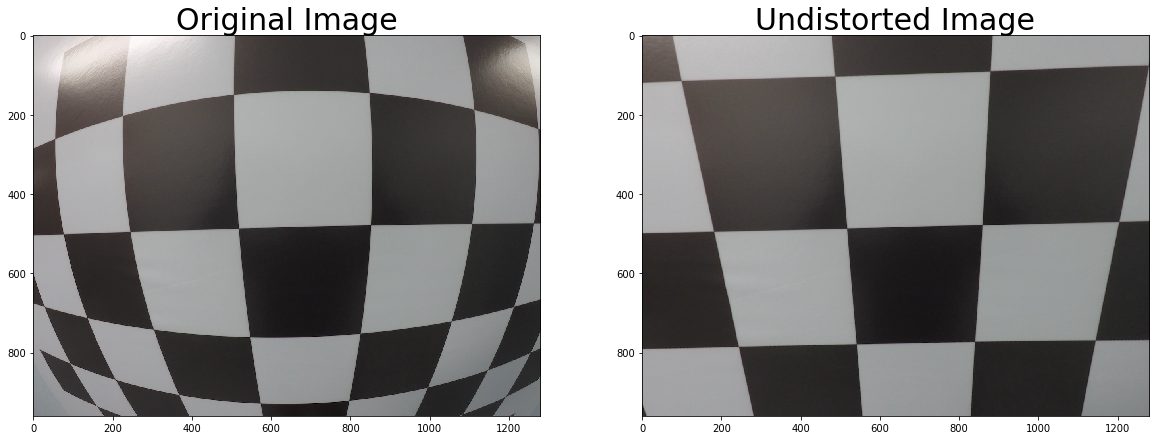

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)